In [81]:
import numpy as np
import matplotlib.pyplot as plt

def my_func(x):
    return -5*x-3

my_func_vec = np.vectorize(my_func)

(-18.3, 12.3)

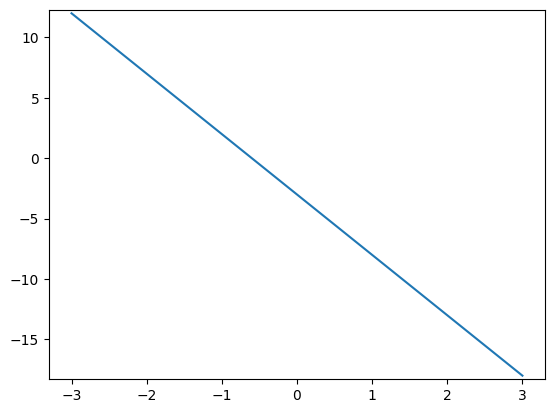

In [82]:
x_in = np.linspace(-3,3)
f_x = my_func_vec(x_in)
max_y = max(f_x)
min_y = min(f_x)
offset = np.abs(0.1*(max_y + min_y)/2)
plt.plot(x_in, f_x)
plt.ylim(min_y - offset, max_y + offset)

In [83]:
def first_der(func, x, delta = 1e-3):
    return (func(x+delta)-func(x))/delta

(-5.500000000002636, -4.499999999998927)

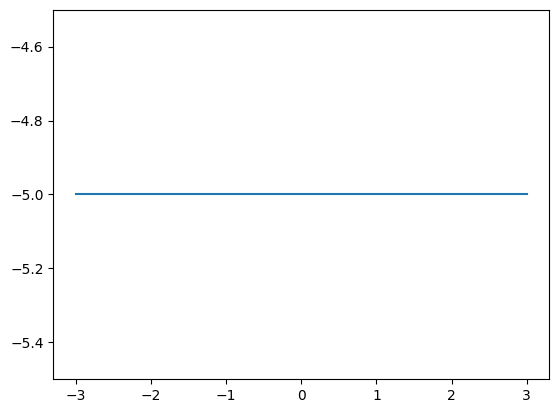

In [84]:
f_x_prime = first_der(my_func_vec, x_in)
max_y = max(f_x_prime)
min_y = min(f_x_prime)
offset = np.abs(0.1*(max_y + min_y)/2)
plt.plot(x_in, f_x_prime)
plt.ylim(min_y - offset, max_y + offset)

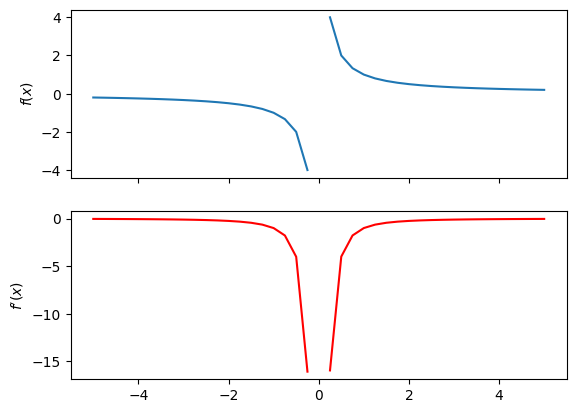

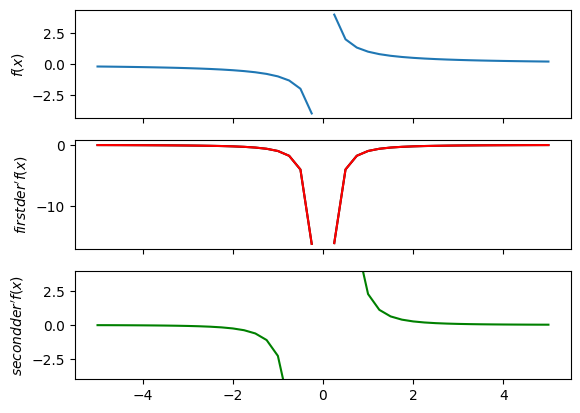

In [7]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    try:
        return 1/x
    except:
        return np.nan

my_func_vec = np.vectorize(func)

def derivative(func,x,delta = 1e-3):
    try:
        return (func(x+delta)-func(x))/delta
    except:
        return np.nan

def get_nan_copy(arr, arr_idx):
    temp = np.zeros_like(arr)
    temp.fill(np.nan)
    temp[arr_idx] = arr[arr_idx]
    return temp


def plot_graph(function):
    step_sz = 0.25
    x_in = np.arange(-5,5 + step_sz,step=step_sz)
    f_x = function(x_in)
    f_x_prime = derivative(my_func_vec,x_in)
    f_2x_prime = np.gradient(f_x_prime,x_in)
    max_y = np.nanmax(f_x)
    min_y = np.nanmin(f_x)
    offset = np.abs(0.1*(max_y + min_y)/2)
    fig, axes = plt.subplots(3, sharex=True)
    axes[0].plot(x_in,f_x)
    axes[0].set(ylabel = '$f(x)$')
    neg_idx = f_x_prime < 0
    #temp = np.zeros_like(f_x_prime)
    #temp.fill(np.nan)
    #temp[neg_idx] = f_x_prime[neg_idx]
    temp = get_nan_copy(f_x_prime,neg_idx)
    # axes[1].plot(x_in,f_x_prime, color = 'pink')
    # axes[1].plot(x_in,f_x_prime, linestyle='none', marker='*')
    axes[1].plot(x_in,f_x_prime,color ="black")
    axes[1].plot(x_in,temp, color = 'red')
    temp = get_nan_copy(f_x_prime,~neg_idx)
    axes[1].plot(x_in,temp, color = 'blue')
    #axes[1].plot(x_in[neg_idx],f_x_prime[neg_idx], color = 'red', linestyle='none', marker='o')
    #axes[1].plot(x_in[~neg_idx],f_x_prime[~neg_idx], color = 'purple', linestyle='none', marker='o')
    axes[1].set(ylabel = '$first der\'f(x)$')
    #axes[1].axhline(y=0, color='black')
    axes[2].set(ylabel = '$second der\'f(x)$')
    axes[2].plot(x_in, f_2x_prime,color = 'green')
    plt.ylim(min_y - offset, max_y + offset)
    
    return f_x, f_x_prime,f_2x_prime,fig


f_x, f_x_prime,f_2x_prime,fig = plot_graph(my_func_vec)


In [1]:
st.title("Graph of derivataive")#title of site




2023-12-29 08:57:58.216 
  command:

    streamlit run C:\Users\Ali\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [26]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import lambdify
from sympy.parsing.sympy_parser import parse_expr

 
def func(func_str):
    x = sympy.symbols("x")
    expr = parse_expr(func_str)
    f = lambdify(x, expr)
    return f

x_in = np.arange(-5,5.5,step = 0.5)
my_func_vec = np.vectorize(func("x"))
print(my_func_vec)

In [14]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt


# 1. use input as a str
# 2. convert user str to sympy expr
# 3. lambdify sympy expr --> gives you a "def func(x):...." version of the sympy expr
# 4. vectorize the result from step #3 and plot the results


def func(func_str):
    x = sympy.symbols("x")
    expr = parse_expr(func_str)
    f = lambdify(x, expr)
    return f

def func_val(func,x):
    try:
        return func(x)
    except:
        return np.nan
    

my_func_vec = np.vectorize(func)

def derivative(func, x, delta=1e-3):
    try:
        result = (func_val(func, x + delta) - func_val(func, x)) / delta
        if np.isnan(result).all():
            return np.nan
        return result
    except:
        return np.nan


def get_nan_copy(arr, arr_idx):
    temp = np.zeros_like(arr)
    temp.fill(np.nan)
    temp[arr_idx] = arr[arr_idx]
    return temp


# Plot the graph of a function and its first and second derivatives
def plot_graph(function, domain, step_sz):
    x_in = np.arange(-domain, domain + step_sz, step=step_sz)
    f_x = function(x_in)
    f_x_prime = derivative(function, x_in)
    f_2x_prime = np.gradient(f_x_prime, x_in)

    # Create subplots for the function and its derivatives
    fig, axes = plt.subplots(3, sharex=True)
    axes[0].plot(x_in, f_x)
    axes[0].set(ylabel='$f(x)$')

    # Plot the first derivative with interpolated NaN values
    neg_idx = f_x_prime < 0
    temp = get_nan_copy(f_x_prime, neg_idx)
    if np.any(~neg_idx):
        temp = np.interp(x_in, x_in[~neg_idx], temp[~neg_idx])
    axes[1].plot(x_in, temp, color='red')
    temp = get_nan_copy(f_x_prime, ~neg_idx)
    if np.any(neg_idx):
        temp = np.interp(x_in, x_in[neg_idx], temp[neg_idx])
    axes[1].plot(x_in, temp, color='blue')
    axes[1].set(ylabel="$f'(x)$")

    # set limits to the y-axis of the subplots
    max_y = np.nanmax(f_x_prime)
    min_y = np.nanmin(f_x_prime)
    offset = np.abs(0.1 * (max_y + min_y) / 2)
    axes[1].set_ylim(min_y - offset, max_y + offset)

    # Plot the second derivative with interpolated NaN values
    f_2x_prime[np.abs(f_2x_prime) < 1e-5] = 0
    if np.any(np.abs(f_2x_prime) > 1e-5):
        temp = np.interp(x_in, x_in[np.abs(f_2x_prime) > 1e-5], f_2x_prime[np.abs(f_2x_prime) > 1e-5])
    else:
        temp = np.full_like(x_in, np.nan)
    axes[2].plot(x_in, temp, color='green')

    # set limits to the y-axis of the subplots
    max_y = np.nanmax(temp)
    min_y = np.nanmin(temp)
    offset = np.abs(0.5 * (max_y + min_y) / 2)
    axes[2].set_ylim(min_y - offset, max_y + offset)

    return f_x, f_x_prime, f_2x_prime, fig





st.title("Graph of derivative")  # title of site
domain = float(st.slider(label = "domain",min_value=1,max_value=300))
functions = str(st.text_input("function: "))
if functions == "":
    functions = "1/x"
f = func(functions)
f_x, f_x_prime,f_2x_prime,fig = plot_graph(f,20,0.5)
st.pyplot(fig)




<lambdifygenerated-7>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return x**(-1.0)


ValueError: Axis limits cannot be NaN or Inf

In [31]:


# Define the function f(x) = 1/x
def func(x):
    return 1 / x

def numerical_derivative(func, x, delta=1e-5):
    try:
        result = (get_function_value(func, x + delta) - get_function_value(func, x)) / delta
        return np.nan if np.isnan(result).all() else result
    except:
        return np.nan


# Define a function to get the function value at a specific point
def get_function_value(func, x):
    try:
        return func(x)
    except ZeroDivisionError:
        return np.nan


def replace_singularity_with_nans(fx, arr_input):
    result = np.empty_like(arr_input, dtype=float)
    epsilon = 1e-5  # Tolerance for singularity

    for i, x_value in enumerate(arr_input):
        try:
            func_result = get_function_value(fx, x_value)

            # Check if the result is NaN or infinite
            if np.isnan(func_result) or np.isinf(func_result):

                # Check if the singularity is within epsilon distance
                if np.abs(x_value) < epsilon:
                    result[i] = np.nan
                elif i < len(arr_input) - 1 and np.abs(x_value + arr_input[i+1]) < epsilon:
                    # Insert NaN between consecutive elements whose sum is near zero
                    result[i] = func_result
                    result = np.insert(result, i+1, np.nan)
                else:
                    result[i] = np.nan
            else:
                result[i] = func_result
        except (ZeroDivisionError, ValueError):
            result[i] = np.nan

    return result


def replace_singularity_with_nans2(fx, arr_input):
    result = np.empty_like(arr_input, dtype=float)
    epsilon = 1e-5  # Tolerance for singularity
    for i, x_value in enumerate(arr_input):
        try:
            func_result = get_function_value(fx, x_value)
            
            # Calculate the numerical derivative at the current point
            derivative_at_x = numerical_derivative(fx, x_value)

            # Check if the result is NaN or infinite
            if np.isnan(func_result) or np.isinf(func_result):

                # Check if the singularity is within epsilon distance or the derivative is close to zero
                if np.abs(x_value) < epsilon or np.isclose(derivative_at_x, 0):
                    result[i] = np.nan
                elif i < len(arr_input) - 1 and np.abs(x_value + arr_input[i+1]) < epsilon:
                    # Insert NaN between consecutive elements whose sum is near zero
                    result[i] = func_result
                    result = np.insert(result, i+1, np.nan)
                else:
                    result[i] = np.nan
            else:
                result[i] = func_result
        except (ZeroDivisionError, ValueError):
            result[i] = np.nan

    return result

        



# Define the range and number of points
start = -1
stop = 1
num_points = 50  # Including both start and stop points

# Create the array of values
arr_values = np.linspace(start, stop, num_points)

# Use replace_singularity_with_nans to handle singularities
result_array = replace_singularity_with_nans(func, arr_values)

# Display the resulting array
print(result_array)

[ -1.          -1.04255319  -1.08888889  -1.13953488  -1.19512195
  -1.25641026  -1.32432432  -1.4         -1.48484848  -1.58064516
  -1.68965517  -1.81481481  -1.96        -2.13043478  -2.33333333
  -2.57894737  -2.88235294  -3.26666667  -3.76923077  -4.45454545
  -5.44444444  -7.          -9.8        -16.33333333 -49.
  49.          16.33333333   9.8          7.           5.44444444
   4.45454545   3.76923077   3.26666667   2.88235294   2.57894737
   2.33333333   2.13043478   1.96         1.81481481   1.68965517
   1.58064516   1.48484848   1.4          1.32432432   1.25641026
   1.19512195   1.13953488   1.08888889   1.04255319   1.        ]
